# The intra-EU politics of brain drain - NetworkX analysis

The purpose of this analysis is to explore a hand-coded set of Parliamentary Questions posed in the European Parliament concerning the topic of 'brain drain' as an intra-European Union phenomenon. The topic has become increasingly controversial in recent years with the growing politicization of the negative externalities of European labor mobility. 

The following table displays the number of questions asked during each of the last four parliamentary periods. 

|                            |     Stage  1    | Stage 1 (continued) |     Stage 2     |     Stage 3     |             |
|:--------------------------:|:---------------:|:-------------------:|:---------------:|:---------------:|:-----------:|
|    Parliamentary period    |    1999-2004    |      2004-2009      |    2009-2014    |    2014-2019    |    Total    |
|     Number of questions    |        5        |          26         |        43       |        32       |     105     |

Going through these questions in the [Discourse Network Analyzer](https://github.com/leifeld/dna) software, I identified a total of 675 statements uttered by 133 different persons (Members of the European Parliament and Commissioners). Each statement was coded according to an iteratively developed coding scheme that exhausted all the different ways that brain drain was presented as a problem, as well as the solutions offered to the problem. 

I start by importing the required packages for NetworkX (including bipartite algorithms, as this is a two-mode network) as well as Pandas for dataframe management.  

NOTE: THERE ARE 133 NODES, BUT NOT ALL OF THEM ARE PERSONS. USE THE BIPARTITE FUNCTIONS AND FIND OUT HOW MANY ARE IN EACH SET. 

In [2]:
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd

Next I read the data using Pandas read_excel function and load it to check that it looks correct. Use double back-slashes because Python uses single backslashes to escape characters that otherwise have a special meaning. 

In [3]:
df = pd.read_excel("data/braindrain.xlsx")

df

,ID,ARTICLE TITLE,DATE,STAGE,PERSON,ORGANIZATION,MEP,COUNTRY,CATEGORY,TEXT
0,2,E-0148/99,1999-02-11 00:00:00,1,Joaquin Sisó Cruellas (EPP),EPP,Y,Spain,Problem - Third country emigration,Participation in international education and t...
1,35,E-0148/99,1999-02-11 00:00:00,1,Joaquin Sisó Cruellas (EPP),EPP,Y,Spain,Problem - Working conditions,It would appear that the presence of centres o...
2,1,E-0148/99,1999-02-11 00:00:00,1,Joaquin Sisó Cruellas (EPP),EPP,Y,Spain,Solution - R&D,"Once abroad, European scientists often find it..."
3,36,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - Increase mobility,The Commission is concerned with the trends sh...
4,3,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - Refutation,The success of this scholarship scheme proves ...
5,4,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - Member States,"In line with the subsidiarity principle, actio..."
6,5,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - Private sector,"As is also indicated in the IPTS report, the E..."
7,37,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - R&D,The Commission will continue its efforts to st...
8,7,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - Circular migration,With regard to the brain drain within the Comm...
9,6,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - Member States,The Commission also encourages the cohesion Me...


With NetworkX, I now create a graph object by using the function to read from a Pandas dataframe, identified as an edgelist that displays connections from persons to categories. Persons here are the Members of the European Parliament asking the questions or Commissioners answering the questions, and categories are a coding scheme of frames that identify brain drain as a specific type of problems and suggested solutions to the problem. I also read the dates associated with each occurence of a statement to timestamp all the edges. The "STAGE" attribute groups dates into stages 1, 2, or 3 as identified previously. I can also store the actual text of each statement within each edge.

The printed info tells us that the amount of edges corresponds to the number of statements I identified, and the amount of nodes corresponds to the number of individual persons identified. 

In [4]:
G = nx.from_pandas_edgelist(df,
                            source="PERSON",
                            target="CATEGORY",
                            edge_attr=["DATE", "STAGE", "TEXT"],
                            create_using=nx.MultiGraph(),
                            )

print(nx.info(G))

Name: 
Type: MultiGraph
Number of nodes: 133
Number of edges: 675
Average degree:  10.1504


In [5]:
print("Is the graph bipartite?")
nx.is_bipartite(G)

Is the graph bipartite?


True

We can also check to see whether the edges are correctly timestamped by listing the edges and reading their associated data.

In [6]:
list(G.edges(data=True))

[('Joaquin Sisó Cruellas (EPP)',
  'Problem - Third country emigration',
  {'DATE': Timestamp('1999-02-11 00:00:00'),
   'STAGE': 1,
   'TEXT': 'Participation in international education and training on the one hand, and the demand from companies for qualified staff with international experience on the other, have stimulated interest in working abroad amongst young scientists. The USA is the principal destination of European emigrants, and most of them have executive and management posts. It should also be stressed that approximately 50 % of all Europeans who complete a degree in the USA remain in that country for a longer period, and even for good, with European Ph.Ds staying there much longer on average than their Korean or Japanese counterparts'}),
 ('Joaquin Sisó Cruellas (EPP)',
  'Problem - Working conditions',
  {'DATE': Timestamp('1999-02-11 00:00:00'),
   'STAGE': 1,
   'TEXT': 'It would appear that the presence of centres of excellency in the USA is a major attraction, alongsi

Next, I want to store some attributes for each node. Node attributes can be read from dictionaries using the nx.set_node_attributes function. First, I have to create some dictionaries. I use the zip function to create dictionaries where persons are keys and organizations, countries, and MEP status enters as values. 

In [7]:
org_dict = dict(zip(df.PERSON, df.ORGANIZATION))
country_dict = dict(zip(df.PERSON, df.COUNTRY))
mep_dict = dict(zip(df.PERSON, df.MEP))

I can check to see if the dictionary was correctly created by calling a person from the dataset. 

In [8]:
print(org_dict['Catherine Ashton'])
print(country_dict['Catherine Ashton'])
print(mep_dict['Catherine Ashton'])

External Action
United Kingdom
N


Now I set node attributes using those dictionaries. 

In [9]:
nx.set_node_attributes(G, org_dict, 'ORGANIZATION')
nx.set_node_attributes(G, country_dict, 'COUNTRY')
nx.set_node_attributes(G, mep_dict, 'MEP')

Checking to see if it worked with the list function, we can confirm that all person nodes are now associated with countries, MEP status, and an organization. 

In [10]:
list(G.nodes(data=True))

[('Joaquin Sisó Cruellas (EPP)',
  {'COUNTRY': 'Spain', 'MEP': 'Y', 'ORGANIZATION': 'EPP'}),
 ('Problem - Third country emigration', {}),
 ('Problem - Working conditions', {}),
 ('Solution - R&D', {}),
 ('Édith Cresson',
  {'COUNTRY': 'France', 'MEP': 'N', 'ORGANIZATION': 'DG Research'}),
 ('Solution - Increase mobility', {}),
 ('Solution - Refutation', {}),
 ('Solution - Member States', {}),
 ('Solution - Private sector', {}),
 ('Solution - Circular migration', {}),
 ('Erik Meijer (GUE/NGL)',
  {'COUNTRY': 'Netherlands', 'MEP': 'Y', 'ORGANIZATION': 'GUE/NGL'}),
 ('Problem - Shortages', {}),
 ('Problem - Skills and training', {}),
 ('Viviane Reding',
  {'COUNTRY': 'Luxembourg', 'MEP': 'N', 'ORGANIZATION': 'DG EAC'}),
 ('Solution - Harmonization', {}),
 ('Brice Hortefeux (EPP)',
  {'COUNTRY': 'France', 'MEP': 'Y', 'ORGANIZATION': 'EPP'}),
 ('Problem - R&D', {}),
 ('Problem - Competitiveness', {}),
 ('Philippe Busquin',
  {'COUNTRY': 'Belgium', 'MEP': 'N', 'ORGANIZATION': 'DG Research'})

I should find out which nodes are categories and which are persons. I can use NetworkX's bipartite algorithms for this. 

In [14]:
bottom_nodes, top_nodes = bipartite.sets(G)
print(list(top_nodes))

['Solution - Skills and training', 'Problem - Economic crisis', 'Problem - Competitiveness', 'Problem - Skills and training', 'Solution - Circular migration', 'Solution - R&D', 'Solution - Austerity', 'Solution - Job creation', 'Solution - Working conditions', 'Solution - Increase mobility', 'Solution - Development', 'Solution - Member States', 'Problem - Third country emigration', 'Problem - Demographics', 'Problem - Shortages', 'Problem - Eastern drain', 'Solution - Refutation', 'Solution - Cohesion policy', 'Problem - Development', 'Solution - Harmonization', 'Problem - Austerity', 'Problem - Southern drain', 'Problem - Youth unemployment', 'Problem - Working conditions', 'Solution - Private sector', 'Solution - Restrict mobility', 'Problem - R&D']


Next, I create a dictionary "c" associating each node with the value 0 or 1 depending on their membership in top_nodes or bottom_nodes. 

In [24]:
c = bipartite.color(G)
print(c)

{'Joaquin Sisó Cruellas (EPP)': 1, 'Problem - Third country emigration': 0, 'Problem - Working conditions': 0, 'Solution - R&D': 0, 'Édith Cresson': 1, 'Philippe Busquin': 1, nan: 1, 'Manolis Mavrommatis (EPP)': 1, 'Janez Potocnik': 1, 'Ján Figel': 1, 'Frank Vanhecke (ITS)': 1, 'Máire Geoghegan-Quinn': 1, 'Matteo Salvini (EFD)': 1, 'Johannes Hahn': 1, 'Francisco Sosa Wagner (NI)': 1, 'Carlos Moedas': 1, 'Marianne Thyssen': 1, 'Lefteris Christoforou (EPP)': 1, 'Tibor Navracsics': 1, 'Catalin Sorin Ivan (S&D)': 1, 'Problem - R&D': 0, 'Brice Hortefeux (EPP)': 1, 'Robert Evans (PSE)': 1, 'Teresa Riera Madurell (S&D)': 1, 'Emmanouil Angelakas (EPP)': 1, 'Nirj Deva (EPP)': 1, 'Louis Michel': 1, 'Ioannis A. Tsoukalas (EPP)': 1, 'Ioannis A. Tsoukalas (EPP) & Georgios Papanikolaou (EPP)': 1, 'Niki Tzavela (EFD)': 1, 'Maria Irigoyen Pérez (S&D)': 1, 'Willy Meyer (GUE/NGL)': 1, 'Josu Juaristi Abaunz (GUE/NGL)': 1, 'Ivan Jakovcic (ALDE)': 1, 'Daniel Buda (EPP)': 1, 'Notis Marias (ECR)': 1, 'Dimitr

I store the bipartite.color dictionary as a new attribute for each node. 

In [28]:
nx.set_node_attributes(G, c, 'bipartite')

In [29]:
print(G.nodes(data=True)) # Checking here to see if bipartite values are now stored in each node. 

[('Joaquin Sisó Cruellas (EPP)', {'ORGANIZATION': 'EPP', 'COUNTRY': 'Spain', 'MEP': 'Y', 'bipartite': 1}), ('Problem - Third country emigration', {'bipartite': 0}), ('Problem - Working conditions', {'bipartite': 0}), ('Solution - R&D', {'bipartite': 0}), ('Édith Cresson', {'ORGANIZATION': 'DG Research', 'COUNTRY': 'France', 'MEP': 'N', 'bipartite': 1}), ('Solution - Increase mobility', {'bipartite': 0}), ('Solution - Refutation', {'bipartite': 0}), ('Solution - Member States', {'bipartite': 0}), ('Solution - Private sector', {'bipartite': 0}), ('Solution - Circular migration', {'bipartite': 0}), ('Erik Meijer (GUE/NGL)', {'ORGANIZATION': 'GUE/NGL', 'COUNTRY': 'Netherlands', 'MEP': 'Y', 'bipartite': 1}), ('Problem - Shortages', {'bipartite': 0}), ('Problem - Skills and training', {'bipartite': 0}), ('Viviane Reding', {'ORGANIZATION': 'DG EAC', 'COUNTRY': 'Luxembourg', 'MEP': 'N', 'bipartite': 1}), ('Solution - Harmonization', {'bipartite': 0}), ('Brice Hortefeux (EPP)', {'ORGANIZATION':

Next I create a list for storing color information, iterating over each node in G and adding the color 'red' for top_nodes and 'blue' for bottom_nodes. 

In [61]:
colors=[]

for n in G.nodes:
    if n in top_nodes:
        colors.append('r')
    else:
        colors.append('b')

In [63]:
colors # Colors are stored in a list and appear in the order in which nodes are also listed. Position in each list corresponds to the other. 

['b',
 'r',
 'r',
 'r',
 'b',
 'r',
 'r',
 'r',
 'r',
 'r',
 'b',
 'r',
 'r',
 'b',
 'r',
 'b',
 'r',
 'r',
 'b',
 'r',
 'b',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'r',
 'b',
 'r',
 'r',
 'r',
 'b',
 'b',
 'b',
 'r',
 'b',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b']

The code below draws the diagram with colored nodes where blue are persons and red are categories. I export the image as 'bd1.png'. 

In [68]:
import matplotlib.pyplot as plt

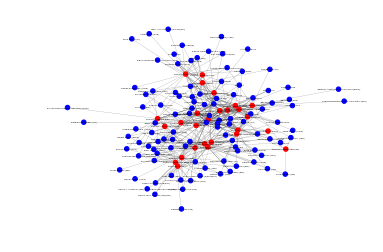

In [100]:
nx.draw_networkx(G,
                with_labels=True,
                node_size=20,
                width=0.2,
                node_color=colors,
                edge_color='gray',
                font_size=2
                )

plt.axis('off')
plt.figure(1, figsize=(2000, 2000))
plt.savefig('bd1.png', dpi=1000)